# import libraries

In [16]:
import numpy as np
import pandas as pd
import glob
import sys, os
sys.path.append(os.path.realpath("/home/ms994/beat_pd2"))
import matplotlib.pyplot as plt

In [17]:
import src.main
import momo.tf_mapper as tfm

# Try to review the data again

In [18]:
train_watch_accel = glob.glob("/home/ms994/beat_pd/data/real-pd/training_data/smartwatch_accelerometer/*.csv")
train_watch_gyro = glob.glob("/home/ms994/beat_pd/data/real-pd/training_data/smartwatch_gyroscope/*.csv")
train_phone_accel = glob.glob("/home/ms994/beat_pd/data/real-pd/training_data/smartphone_accelerometer/*.csv")

In [19]:
src.main.read_seq(train_watch_accel[0]).head()

,x,y,z
t,,,
0.000,1.786075,-5.382165,8.226477
0.023,1.800440,-5.262455,8.212111
0.040,1.781286,-5.439626,8.212111
0.063,1.762132,-5.453991,8.221688
0.080,1.843535,-5.530606,8.145074


In [132]:
labels = pd.concat([pd.read_csv("/home/ms994/beat_pd/data/real-pd/data_labels/REAL-PD_Training_Data_IDs_Labels.csv"),pd.read_csv("/home/ms994/beat_pd/data/real-pd/data_labels/REAL-PD_Ancillary_Data_IDs_Labels.csv")])

In [135]:
labels.measurement_id.unique().shape

(1081,)

In [136]:
labels.shape

(1081, 5)

In [21]:
%%bash
ls /home/ms994/beat_pd/data/real-pd/clinical_data/REAL-PD_Smartphone_Metadata.csv

/home/ms994/beat_pd/data/real-pd/clinical_data/REAL-PD_Smartphone_Metadata.csv


In [22]:
phone_meta = pd.read_csv("/home/ms994/beat_pd/data/real-pd/clinical_data/REAL-PD_Smartphone_Metadata.csv")
phone_meta.head()

,subject_id,smartphone_brand,smartphone_model,android_version,Most_Common_Smartphone_Location,Smartphone_Location_Other
0,hbv002,Samsung,Note 8,7.1.1,Front pocket,NaN
1,hbv012,Samsung,Galaxy J3,5.1.1,Front pocket,NaN
2,hbv013,Samsung,S5 Neo,6.0.1,Front pocket,NaN
3,hbv014,Samsung,J5,6.0.1,Front pocket,NaN
4,hbv016,Huawei,Ascent 550,4.4,Front pocket,NaN


In [32]:
phone_meta.Most_Common_Smartphone_Location.unique()

array(['Front pocket', 'Other', 'Back pocket', 'Jacket'], dtype=object)

In [33]:
phone_meta.Smartphone_Location_Other.unique()

array([nan, 'vlakbij me',
       'elastisch heuptasje welke je ook gebruikt tijdens het sporten'],
      dtype=object)

In [23]:
demographics =  pd.read_csv("/home/ms994/beat_pd/data/real-pd/clinical_data/REAL-PD_Demographics.csv")
demographics.head()

,subject_id,Age,Gender
0,hbv002,65,Male
1,hbv012,57,Female
2,hbv013,68,Female
3,hbv014,67,Male
4,hbv016,71,Male


In [24]:
all_device_id = {}

In [25]:
for fn in train_watch_accel:
    df = pd.read_csv(fn)
    all_device_id[fn] = df.device_id.unique()

In [26]:
dev_num = {}
for key in all_device_id.keys():
    dev_num[key] = len(all_device_id[key])

(array([394.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 141.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

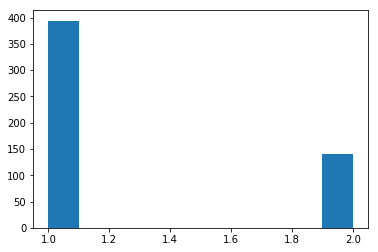

In [27]:
plt.hist(pd.Series(dev_num))

In [28]:
dev_acc_num = pd.Series(dev_num) 

In [29]:
all_device_id = {}
for fn in train_watch_gyro:
    df = pd.read_csv(fn)
    all_device_id[fn] = df.device_id.unique()
dev_num = {}
for key in all_device_id.keys():
    dev_num[key] = len(all_device_id[key])
dev_gyro_num = pd.Series(dev_num)

In [30]:
(set(dev_acc_num[dev_acc_num == 2].index) == set(dev_gyro_num[dev_gyro_num == 2].index))

False

In [147]:
set(map(lambda x: x[68:-4], dev_gyro_num.keys())) == set(map(lambda x: x[72:-4], dev_acc_num.keys()))

True

# Create a new index on the device num, combining real_pd and cis_pd

In [50]:
toUse = list(map(lambda x: (x[68:-4], all_device_id[x]), list(all_device_id.keys())))

,measurement_id,subject_id,on_off,dyskinesia,tremor
339,29084e8f-4ded-4bc4-8837-b42aafd0b211,hbv054,NaN,NaN,0.0


In [148]:
newLabels = []
for m_id, deviceArray in toUse:
    base = (labels[labels.measurement_id == m_id])
    for device in deviceArray:
        toAdd = base.copy()
        toAdd["device_id"] = device
        newLabels.append(toAdd)

In [149]:
newLabels = pd.concat(newLabels)

In [150]:
newLabels["smartwatch_data"]=True

In [151]:
newLabels.head()

,measurement_id,subject_id,on_off,dyskinesia,tremor,device_id,smartwatch_data
339,29084e8f-4ded-4bc4-8837-b42aafd0b211,hbv054,NaN,NaN,0.0,2WLT,True
88,439bc1b9-1b23-4691-a454-f4e1c7b8e4d9,hbv038,1.0,NaN,3.0,2WH8,True
534,b36b10ee-94d2-47e1-bc24-59760c976e6b,hbv022,0.0,NaN,0.0,327T,True
297,5b8eafee-0b7e-42ec-9cad-42b173bc5005,hbv077,0.0,NaN,NaN,2VSP,True
266,1dd1609d-b818-4cc0-a1b8-1d8066332a9e,hbv051,0.0,NaN,NaN,2VSP,True


In [153]:
gyro = list(map(lambda x: x[68:-4], train_watch_gyro))

In [154]:
newLabels["gyro_data"] = False

In [155]:
for gyro_m_id in gyro:
    newLabels.loc[newLabels.measurement_id==gyro_m_id, "gyro_data"] = True

In [156]:
newLabels['gyro_data'] = newLabels['gyro_data'].fillna(False)
newLabels['gyro_data'].mean()

1.0

In [157]:
newLabels

,measurement_id,subject_id,on_off,dyskinesia,tremor,device_id,smartwatch_data,gyro_data
339,29084e8f-4ded-4bc4-8837-b42aafd0b211,hbv054,NaN,NaN,0.0,2WLT,True,True
88,439bc1b9-1b23-4691-a454-f4e1c7b8e4d9,hbv038,1.0,NaN,3.0,2WH8,True,True
534,b36b10ee-94d2-47e1-bc24-59760c976e6b,hbv022,0.0,NaN,0.0,327T,True,True
297,5b8eafee-0b7e-42ec-9cad-42b173bc5005,hbv077,0.0,NaN,NaN,2VSP,True,True
266,1dd1609d-b818-4cc0-a1b8-1d8066332a9e,hbv051,0.0,NaN,NaN,2VSP,True,True
535,faf50397-21ef-4f14-b203-9a6fc4ba70d2,hbv022,0.0,NaN,0.0,327T,True,True
214,7bee6251-c39e-4feb-bbd2-055ab31131b8,hbv023,NaN,NaN,3.0,327T,True,True
214,7bee6251-c39e-4feb-bbd2-055ab31131b8,hbv023,NaN,NaN,3.0,2WH3,True,True
156,6e290268-7c1c-435a-b688-a4d7b3dfb862,hbv017,NaN,1.0,NaN,2WH7,True,True
156,6e290268-7c1c-435a-b688-a4d7b3dfb862,hbv017,NaN,1.0,NaN,2WH5,True,True


In [158]:
phone = list(map(lambda x: x[72:-4], train_phone_accel))

In [159]:
phoneLabels = []
for m_id in phone:
    base = (labels[labels.measurement_id == m_id])   
    toAdd = base.copy()
    toAdd["smartphone_data"] = True
    phoneLabels.append(toAdd)

In [160]:
phoneLabels = pd.concat(phoneLabels)

In [161]:
newLabels = newLabels.reset_index().drop(["index"], axis=1)
phoneLabels = phoneLabels.reset_index().drop(["index"], axis=1)

In [162]:
allLabels = phoneLabels.join(newLabels.set_index("measurement_id"), on="measurement_id", lsuffix="_l", how="outer")

In [163]:
allLabels["smartwatch_data"] = allLabels["smartwatch_data"].fillna(False)

In [166]:
allLabels["dyskinesia"].fillna(allLabels["dyskinesia_l"], inplace=True)
allLabels["on_off"].fillna(allLabels["on_off_l"], inplace=True)
allLabels["tremor"].fillna(allLabels["tremor_l"], inplace=True)
allLabels["subject_id"].fillna(allLabels["subject_id_l"], inplace=True)
allLabels.dropna(["dyskinesia_l", "on_off_l", "tremor_l", "subject_id_l"], inplace=True)

/home/ms994/miniconda3/envs/keras-redo-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  """


ValueError: No axis named dyskinesia_l for object type <class 'type'>

In [170]:
allLabels.drop(["dyskinesia_l", "on_off_l", "tremor_l", "subject_id_l"], inplace=True, axis=1)

In [171]:
allLabels.smartwatch_data.mean(), allLabels.smartphone_data.mean()

(0.9234972677595629, 1.0)

In [172]:
allLabels.shape, labels.shape

((732, 9), (1081, 5))

In [174]:
labels.measurement_id[labels.measurement_id.isin(allLabels.measurement_id)].head()

0    ee053d95-c155-400d-ae42-fe24834ad4a9
1    ce51ee31-8553-4321-9f83-8cd3dabe2f66
2    d3c89012-3ab9-4014-b577-61ff05e31968
3    5c42911d-0ebd-47ba-9925-dd5ab1c0ed61
4    235472d5-ad2e-4c76-947e-358c9d8c1280
Name: measurement_id, dtype: object

Gonna make a decision to throw out all gyroscope only data, which is why some measurment ids aren't in this label csv

In [175]:
allLabels.subject_id.unique()

array(['hbv054', 'hbv038', 'hbv022', 'hbv077', 'hbv051', 'hbv023',
       'hbv017', 'hbv018', 'hbv014', 'hbv013', 'hbv043', 'hbv012'],
      dtype=object)

In [176]:
pd.isna(allLabels).mean(axis=0)

measurement_id     0.000000
smartphone_data    0.103825
subject_id         0.000000
on_off             0.453552
dyskinesia         0.569672
tremor             0.494536
device_id          0.076503
smartwatch_data    0.000000
gyro_data          0.076503
dtype: float64

In [ ]:
allLabels.

# Try to setup a data extraction pipeline into TFRecords